<a href="https://colab.research.google.com/github/Pegaxsus/repogaxsus/blob/master/RedNeuronal_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) #array de entrada
fahrenheit = np.array([-40, 14, 32, 46, 58, 72, 100], dtype=float) #array de salida correcto

In [ ]:
#modo capa
#capa = tf.keras.layers.Dense(units=1, input_shape=[1]) #cantidad de conexiones
#modelo = tf.keras.Sequential([capa])

#modo multicapa
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])



In [ ]:
modelo.compile( #compilar modelo 
    optimizer=tf.keras.optimizers.Adam(0.1), #selecionamos optimizador y "fineza"
    loss='mean_squared_error' # definimos qué es un error
)

In [ ]:
print("Comienza entrenamiento..."); #1000 vueltas de entreno
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado.")


Comienza entrenamiento...
Modelo entrenado.


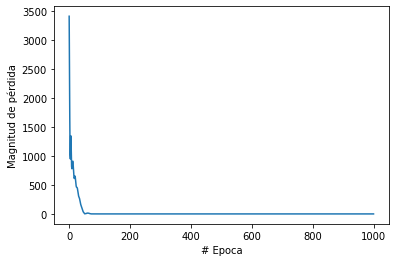

In [ ]:
import matplotlib.pyplot as plt 
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"]) #evolución de errores(Y) en cada vuelta(X)

In [ ]:
print("Hagamos una predicción") # vamos a ver que tal convierte 100C a F
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción
1/1 [==============================] - 0s 82ms/step
El resultado es [[211.34402]] fahrenheit!


In [ ]:
#monocapa
print("Variables internas del modelo") #ver modelo por dentro (pesos)
print(capa.get_weights())

#multicapa
print("Variables internas del modelo") #ver modelo por dentro (pesos)
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())


Variables internas del modelo
[array([[1.7954943]], dtype=float32), array([31.78994], dtype=float32)]
Variables internas del modelo
[array([[-0.35209745,  0.15432288,  0.81435615]], dtype=float32), array([-4.719606 ,  1.0371464,  4.873865 ], dtype=float32)]
[array([[-1.5373055 , -0.57724416, -0.0721956 ],
       [ 0.272182  , -0.09926417, -0.66364896],
       [ 0.7539276 , -0.69794095,  0.00840476]], dtype=float32), array([ 4.7176137, -4.594485 ,  3.7748396], dtype=float32)]
[array([[ 1.344617  ],
       [-0.62599915],
       [ 0.75247544]], dtype=float32), array([4.4285665], dtype=float32)]


In [ ]:
        #peso conexión                #sesgo de salida